<img src="https://i.ibb.co/qjt4Ymb/2022-09-19-004719.png" alt="2022-09-19-004719" border="0">

# AUDL111En_12_Notebook1_Voice: Using PyTorch for audio classification

Refer to "Introduction to audio classification with PyTorch"

https://learn.microsoft.com/en-us/training/modules/intro-audio-classification-pytorch/

## Training set

* Download training set from Google Drive

https://drive.google.com/file/d/1bqFV8NfiU24FRKK9XyBONEBI3Bh1pk6Z/view?usp=sharing
```
%%bash
pip install --upgrade --no-cache-dir gdown
gdown https://drive.google.com/uc?id=1bqFV8NfiU24FRKK9XyBONEBI3Bh1pk6Z
unzip train.zip
rm train.zip
```

In [ ]:
%%bash
pip install --upgrade --no-cache-dir gdown
gdown https://drive.google.com/uc?id=1bqFV8NfiU24FRKK9XyBONEBI3Bh1pk6Z
unzip train.zip
rm train.zip

## 音訊資料和概念

<img alt="Diagram that shows an audio sound wave." src="https://learn.microsoft.com/zh-tw/training/modules/intro-audio-classification-pytorch/images/2-understand-audio-data-1.png" align="middle" />
16bits、44,100赫茲去做取樣。

## WAV format
https://en.wikipedia.org/wiki/WAV

https://zh.wikipedia.org/wiki/WAV

![](https://www.researchgate.net/profile/Artan-Luma-2/publication/265163681/figure/fig1/AS:651531422560256@1532348604142/The-structure-of-wav-file-format.png)

In [4]:
# import the packages
import os
import torchaudio
import IPython.display as ipd
import matplotlib.pyplot as plt

## Read WAV files

In [5]:
filename = "./train/training_voice_data/00002mg.wav"
waveform, sample_rate = torchaudio.load(filepath=filename, num_frames=3)
print(f'waveform tensor with 3 frames:  {waveform} \n')
waveform, sample_rate = torchaudio.load(filepath=filename, num_frames=3, frame_offset =2)
print(f'waveform tensor with 2 frame_offsets: {waveform} \n')
waveform, sample_rate = torchaudio.load(filepath=filename)
print(f'waveform tensor:  {waveform}' )

waveform tensor with 3 frames:  tensor([[-0.0780, -0.0880, -0.0939]]) 

waveform tensor with 2 frame_offsets: tensor([[-0.0939, -0.0925, -0.0867]]) 

waveform tensor:  tensor([[-0.0780, -0.0880, -0.0939,  ...,  0.1908,  0.1856,  0.1802]])


## Plot WAV audio

In [6]:
def plot_audio(filename):
    waveform, sample_rate = torchaudio.load(filename)

    print("Shape of waveform: {}".format(waveform.size()))
    print("Sample rate of waveform: {}".format(sample_rate))

    plt.figure()
    plt.plot(waveform.t().numpy())

    return waveform, sample_rate

Shape of waveform: torch.Size([1, 88200])
Sample rate of waveform: 44100


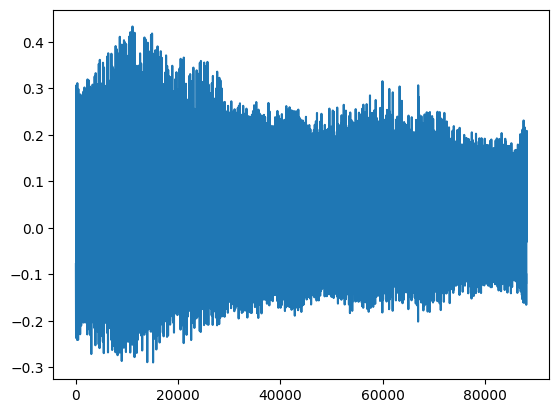

In [7]:
filename = "./train/training_voice_data/00002mg.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)

Shape of waveform: torch.Size([1, 132300])
Sample rate of waveform: 44100


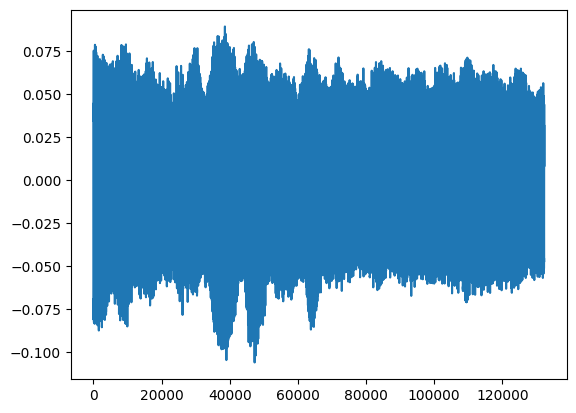

In [8]:
filename = "./train/training_voice_data/00003h4.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)

Shape of waveform: torch.Size([1, 132300])
Sample rate of waveform: 44100


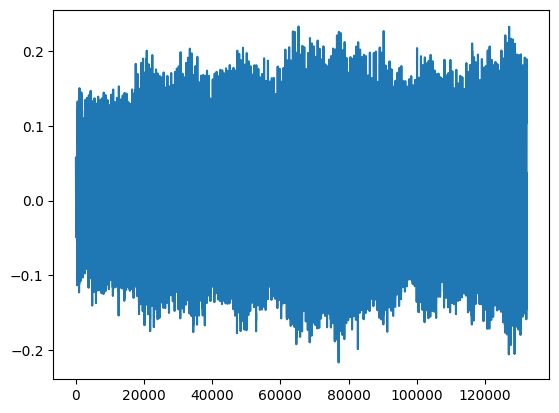

In [9]:
filename = "./train/training_voice_data/0000jil.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)

Shape of waveform: torch.Size([1, 132300])
Sample rate of waveform: 44100


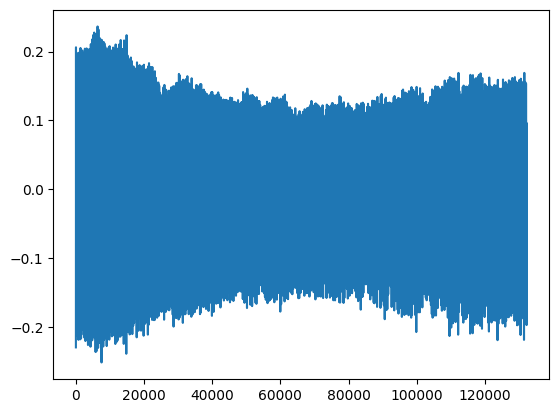

In [11]:
filename = "./train/training_voice_data/0000mfg.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)

In [ ]:
filename = "./train/training_voice_data/0000mfg.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)

## Audio Transform and Visual Effects

In [12]:
import os
import torch
import torchaudio
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from pathlib import Path

In [14]:
def load_audio_files(path: str):

    dataset = []
    walker = sorted(str(p) for p in Path(path).glob(f'*.wav'))

    for i, file_path in enumerate(walker):   
        # Load audio
        waveform, sample_rate = torchaudio.load(file_path)
        dataset.append([sample_rate, waveform])
        
    return dataset

In [15]:
pathname = "./train/training_voice_data/"
trainset = load_audio_files(pathname)

In [16]:
print(f'Length of train dataset: {len(trainset)}')

Length of train dataset: 1000


In [21]:
sample_rate0 = trainset[0][0]
waveform0 = trainset[0][1]
print(f'Waveform: {waveform0}')
print(f'Sample Rate: {sample_rate0}')

Waveform: tensor([[-0.0780, -0.0880, -0.0939,  ...,  0.1908,  0.1856,  0.1802]])
Sample Rate: 44100


In [17]:
def show_waveform(waveform, sample_rate):
    print("Waveform: {}\nSample rate: {}\n".format(waveform, sample_rate))
    new_sample_rate = sample_rate/10
   
    # Resample applies to a single channel, we resample first channel here
    channel = 0
    waveform_transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

    print("Shape of transformed waveform: {}\nSample rate: {}".format(waveform_transformed.size(), new_sample_rate))

    plt.figure()
    plt.plot(waveform_transformed[0,:].numpy())

Waveform: tensor([[-0.0780, -0.0880, -0.0939,  ...,  0.1908,  0.1856,  0.1802]])
Sample rate: 44100

Shape of transformed waveform: torch.Size([1, 8820])
Sample rate: 4410.0


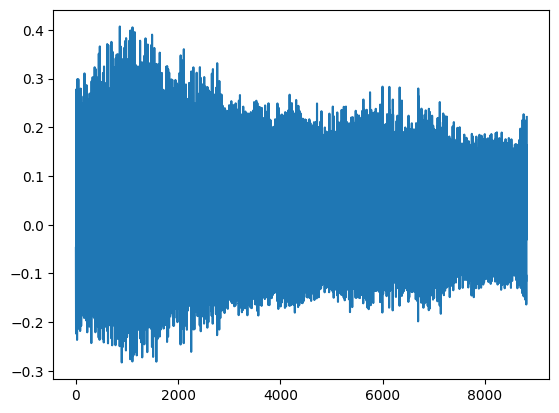

In [22]:
show_waveform(waveform0, sample_rate0)

In [24]:
def show_spectrogram(waveform):
    spectrogram = torchaudio.transforms.Spectrogram()(waveform)
    print("\nShape of spectrogram: {}".format(spectrogram.size()))
    

    plt.figure()
    plt.subplot(1, 1, 1)
    plt.title("Features of {}".format('voice'))
    plt.imshow(spectrogram.log2()[0,:,:].numpy(), cmap='viridis')


Shape of spectrogram: torch.Size([1, 201, 442])


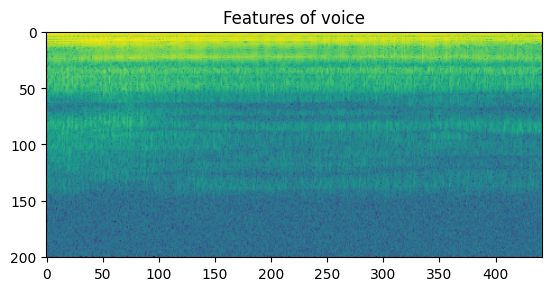

In [25]:
show_spectrogram(waveform0)

In [26]:
def show_melspectrogram(waveform,sample_rate):
    mel_spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate)(waveform)
    print("Shape of spectrogram: {}".format(mel_spectrogram.size()))

    plt.figure()
    plt.imshow(mel_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')

/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Shape of spectrogram: torch.Size([1, 128, 442])


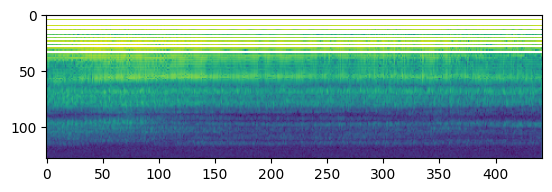

In [28]:
show_melspectrogram(waveform0, sample_rate0)

## Mel-frequency cepstral coefficients (MFCC)

![](https://ithelp.ithome.com.tw/upload/images/20210918/20140944lxnbIYzKR6.png)

https://ithelp.ithome.com.tw/m/articles/10267054

In [29]:
def show_mfcc(waveform,sample_rate):
    mfcc_spectrogram = torchaudio.transforms.MFCC(sample_rate= sample_rate)(waveform)
    print("Shape of spectrogram: {}".format(mfcc_spectrogram.size()))

    plt.figure()
    fig1 = plt.gcf()
    plt.imshow(mfcc_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')
    
    plt.figure()
    plt.plot(mfcc_spectrogram.log2()[0,:,:].numpy())
    plt.draw()

/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Shape of spectrogram: torch.Size([1, 40, 442])


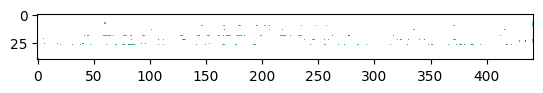

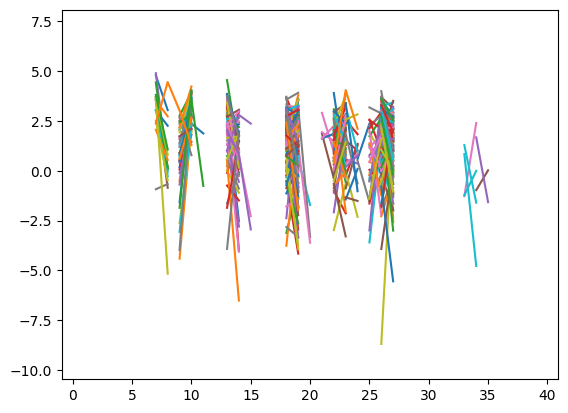

In [30]:
show_mfcc(waveform0,  sample_rate0)

In [ ]:
import os
import glob
sound_path ="./train/training_voice_data/*.wav"
image_path ="./train/" 
files= glob.glob(sound_path)
for i, file_path in enumerate(files):
  path, filename = os.path.split(file_path)
  pre, ext = os.path.splitext(filename)
  spectroimage = pre + ".png"
  outputfile = os.path.join(image_path, spectroimage)
  print(f"{file_path}=>{outputfile}")

In [37]:
image_path ="./train/" 
def load_audio_files2(path: str):

    dataset = []
    walker = sorted(str(p) for p in Path(path).glob(f'*.wav'))
    for i, file_path in enumerate(walker):   
        # Load audio
        waveform, sample_rate = torchaudio.load(file_path)
        path, filename = os.path.split(file_path)
        pre, ext = os.path.splitext(filename)
        spectroimage = pre + ".png"
        outputfile = os.path.join(image_path, spectroimage)
        dataset.append([waveform, sample_rate, outputfile])
        
    return dataset

In [38]:
trainset = load_audio_files2(pathname)
print(f'Length of train dataset: {len(trainset)}')

Length of train dataset: 1000


In [39]:
transform = torchaudio.transforms.Spectrogram(n_fft=400)
for waveform, sample_rate, outputfile in trainset:
  # create transformed waveforms
  spectrogram = transform(waveform)
  plt.imsave(outputfile, spectrogram.log2()[0,:,:].numpy(), cmap='viridis')

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
